In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as dts
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("winequality-white.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# K-Means Clustering

In [9]:
model = KMeans(n_clusters=2)

In [11]:
points = df[['pH', 'alcohol']]

In [12]:
model.fit(points)

KMeans(n_clusters=2)

In [13]:
cluster_array = model.labels_

In [14]:
cluster_array

array([0, 0, 0, ..., 0, 1, 1])

# Visualisasi

In [15]:
x = points['pH']
y = points['alcohol']

In [16]:
centroid = model.cluster_centers_

In [17]:
centroid

array([[ 3.19218237,  9.72151397],
       [ 3.20006072, 11.80866019]])

In [18]:
centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

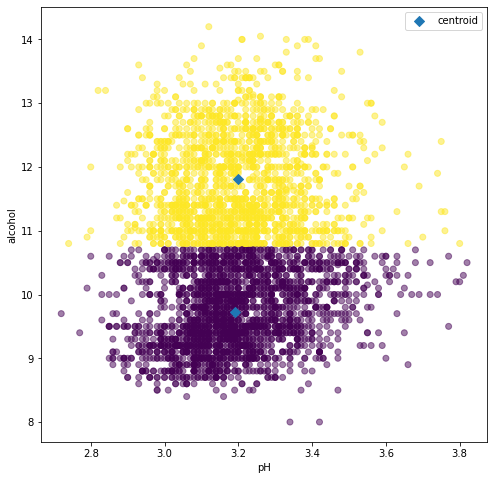

In [20]:
plt.figure(figsize =(8,8))
plt.scatter(x, y, alpha=0.5, c=cluster_array)
plt.scatter(centroid_x, centroid_y, marker='D', s=50, label='centroid')
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.legend()
plt.show()

# Metode Elbow (Menentukan Jumlah Cluster)

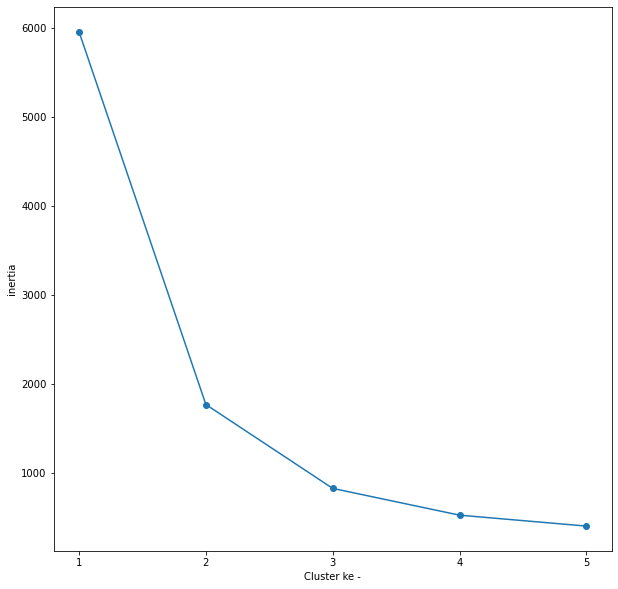

In [21]:
cluster_range = range(1, 6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

#plot ks vs Inertias
plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke -')
plt.ylabel('inertia')
plt.xticks(cluster_range)
plt.show()